<a href="https://colab.research.google.com/github/gcosma/ACO-FS/blob/master/PySampleSize%26PowerCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interactive Python Tutorial. How to carry out Statistical Power Analysis, Determine Sample Size, and Calculate Power Curves for varying Sample and Effect size.




**by Georgina Cosma**

**Date:** 04 August 2019

The aim of this tutorial is to explain and demonstrate how to carry out power analysis for the case of the independent two-sample t-test (equal sample sizes and variances) and calculate power curves for varying sample and effect size in Python.
The tutorial aims to help you answer two questions: 

> "Q1: How big a sample size do I need for my study?”  

> “Q2: how much statistical power does my study have?” 


The content was inspired by [A Gentle Introduction to Statistical Power and Power Analysis in Python](https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/), and you may want also visit Jason's tutorial for more explanations. 

Calculating sample sizes is not always so straight forward, and it is always best to consult a statistician if you require clarity and also reassurance that your calculations are correct.

I have tried to keep text to a minimal (to avoid repeating Jason's explanations) but I added extra explanations to help readers who may need a bit of extra help understanding statistical concepts. 


# **Question 1: How big a sample size do I need?**

**A priori: Compute required sample size - given significance, power, and effect size.**

Some necessary explanations:

**t-test** A t-test is used as a statistical hypothesis testing test, to determine the difference between two **independent** means (two groups).  In other words, it is a test for comparing the means from two groups.

**Type I error - alpha:** the probability of making a Type I error (α-level, two-sided), i.e. the probability of rejecting the null hypothesis when in fact it is true.

**Type II error - beta:** the probability of making a Type II error (β-level), i.e. the probability of accepting the null hypothesis when in fact it is false. Most medical literature uses a beta cut-off of 20% (0.2) -- indicating a 20% chance that a significant difference is missed.

**Ratio of sample sizes in Group 2/Group 1:** The ratio of the number of observations in sample 2 relative to sample 1. The default for ratio is 1; to solve for ratio given the other arguments it has to be explicitly set to None. Ratio should be set to 1 for equal sample sizes in both groups. A ratio of 2 means that group 2 has two times the number of samples compared to group 1.  A ratio of 3 means that group 2 has three times the number of samples compared to group 1, and so forth. 

**Alternative:** is whether the power is calculated for a two-sided (default) or one-sided test. The one-sided test can be either ‘larger’ or ‘smaller’. If you need more information see [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/ ). Basically, a null hypothesis is that the mean is equal to x. A one-tailed test will test either if the mean is significantly greater than x or if the mean is significantly less than x, but not both.

See this for a nice explanation using [**biostatistics**](https://www.sciencedirect.com/topics/nursing-and-health-professions/one-tailed-test) examples. See this for a nice explanation using [**finance**](https://www.investopedia.com/terms/o/one-tailed-test.asp) examples.

This tutorial is using the  [tt_solve_power() function](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html) and it is worth reading the short documentation before running the code below *(as shown in Figure 1)*. 

**Important note:** If your data requires use of non-parametric tests, or your data comprises matched pairs (two dependent means), then you should use a different method to solve power than the one used in this tutorial. The best free tool I have come across so far is the [G*Power calculator](http://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower.html) (*as shown in Figure 2*). Some suitable alternative functions may also be found in section [Power and Sample Size Calculations](https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations).


In [0]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
from google.colab import files
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


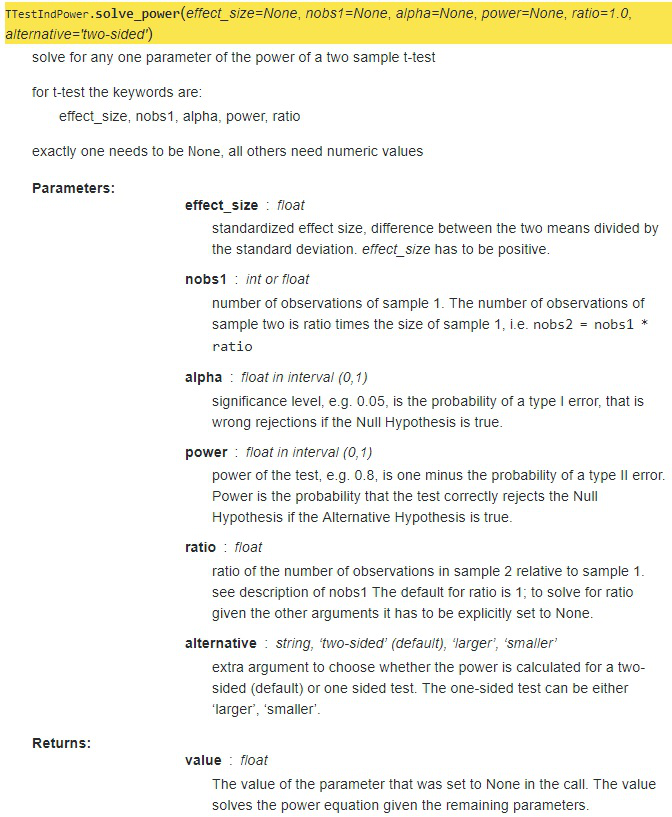

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#if you need to remount
#drive.mount("/content/drive", force_remount=True)

#If you want to unmount and reset then: 
#Step 1: From the menu select Runtime--->Reset all Runtimes... 
#Step 2: Runtime--->Run all or you can run each Cell at a time. There will be a message 
# "Go to a URL in a browser" and you must click on that and copy and paste the authorisation code 
# from the page into the authorisation code text box.

from IPython.display import display
from PIL import Image # pip install pillow if you don't have it
path="/content/drive/My Drive/Colab Notebooks/PowerAnalysis/images/solve_power2.jpg"
display(Image.open(path))

#Figure 1: shows the solve_power parameter options and an explanation for each parameter. 

# Task: We will now estimate a suitable sample size via power analysis. 

Given a set of predefined values shown in Parameter values below, estimate a suitable sample size.

That is, how many observations are required from each sample in order to at least detect  an effect of 0.80 with an 80% chance of detecting the effect if it is true (20% of a Type II error)  and a 5% chance of detecting an effect if there is no such effect (Type I error).

Note: Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium'  effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically signficant.

In [0]:
from statsmodels.stats.power import TTestIndPower

#Parameters values 
# Parameters for power analysis. Change these to fit your own study. 
effect_size = 0.8 
nobs1=None
alpha = 0.05 
power = 0.8 
ratio=1 
alternative='two-sided'

# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, power=power, ratio=ratio, alternative=alternative)
req_sample_size1=round(result)
req_sample_size2=round(result*ratio)
total_sample_size=(req_sample_size1)+(req_sample_size2)

#Print the result
print('Required sample size for group 1: %.0f' % req_sample_size1) #replace the 0 in %.0f with the number of decimal places you want displayed.
print('Required sample size for group 2: %.0f' % req_sample_size2) #replace the 0 in %.0f with the number of decimal places you want displayed.

print('\nTotal sample size: %.0f' % total_sample_size)

Required sample size for group 1: 26
Required sample size for group 2: 26

Total sample size: 52


**Double checking the results: To do so, I have run the test using the G* Power  calculator and the same parameter values.**
 [G*Power](http://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower.html): Statistical Power Analyses for Windows and Mac tool. 

G*Power is a tool to compute statistical power analyses for many different t tests, F tests, χ2 tests, z tests and some exact tests. G*Power can also be used to compute effect sizes and to display graphically the results of power analyses.

**G*Power is free for everyone.**


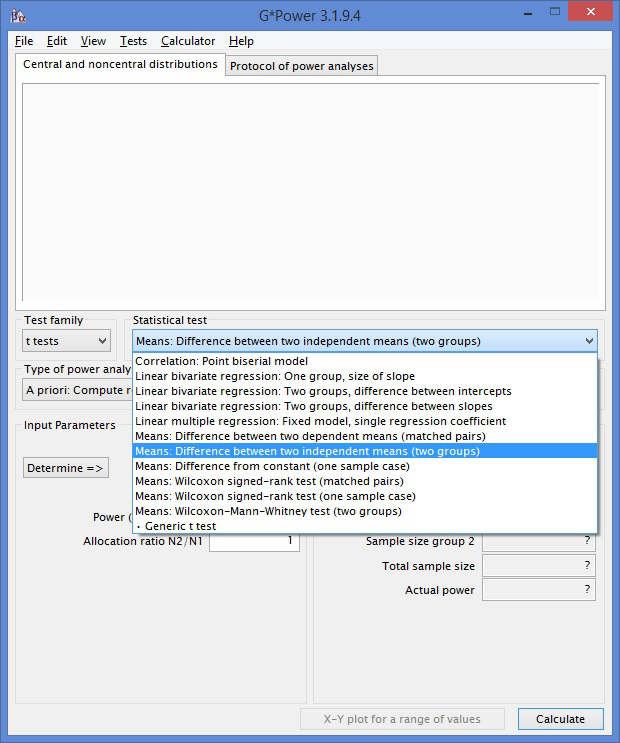

In [0]:
path="/content/drive/My Drive/Colab Notebooks/PowerAnalysis/images/options1.jpg"
display(Image.open(path))
#Figure 2: showing Statistical Test options for Power calculations

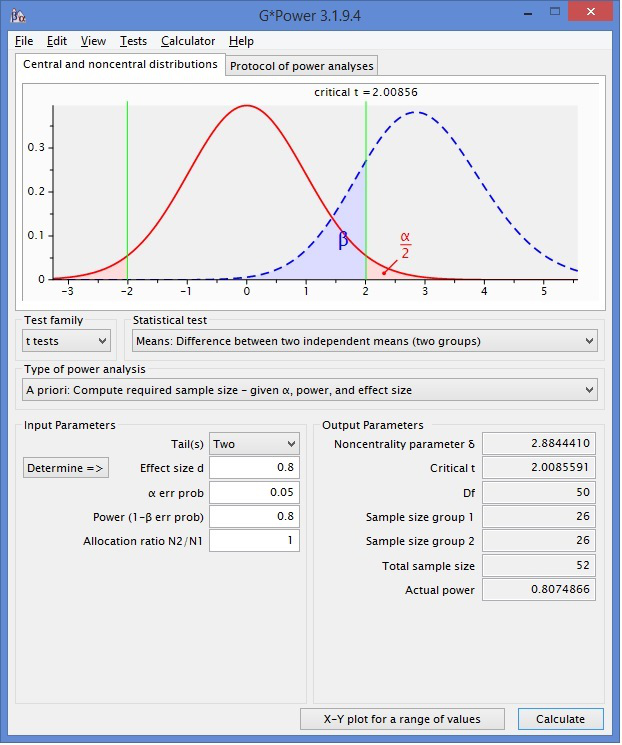

In [0]:
path="/content/drive/My Drive/Colab Notebooks/PowerAnalysis/images/GPower1.jpg"
display(Image.open(path))

#Question 2: How much statistical power does my study have?

**Task: Calculate power curves.**


**What is Power of Test?**  Statistical power is the probability that the test rejects the null hypothesis when a specific alternative hypothesis is true. The statistical power ranges from 0 to 1, and as statistical power increases, the probability of making a type II error decreases.  A test's power is influenced by the choice of significance level for the test, the size of the effect being measured, and the amount of data available. Power of the test, e.g. 0.8, is one minus the probability of a type II error. 

**Power curves** are line plots that show how the change in variables, such as effect size and sample size, impact the power of the statistical test.

The  [plot_power()](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.plot_power.html) function can be used to create power curves. The dependent variable (x-axis) must be specified by name in the ‘dep_var‘ argument. 

Arrays of values can then be specified for the sample size (nobs), effect size (effect_size), and significance (alpha) parameters. One or multiple curves will then be plotted showing the impact on statistical power.

In the three examples below, we assume a significance of 0.01 and 0.05 (the default for the function) and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8) sizes, and when we change the ratio.

In [0]:
# Power vs. number of observations 
# Parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8]) # The larger the effect size, the less likely it is to be random error. 
sample_sizes = array(range(2, 100))

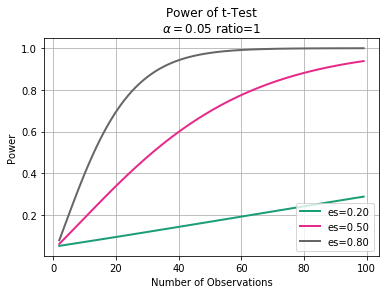

In [0]:
# Calculate power curves from multiple power analyses.
# Assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, ratio=1, title='Power of t-Test' + '\n' + r'$\alpha = 0.05$' + ' ' + 'ratio=1')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

Power of T-Test curve a=0.05, ratio=1. The graph shows the relationship between sample size and power. The sample size (n=26) would be necessary to achieve 80% power with a significance of 0.05 (a=0.05) and a high effect size (es=0.80). See figure below for illustration (grey line). Comparing the results we obtained from Question 1, the results are consistent, and hence the sample size of each group would be n=26,  when ratio is set to 1.

The figure (pink line) also shows the sample size (n=64) would be necessary to achieve 80% power with a significance of 0.05 (a=0.05) and a medium effect size (es=0.50).

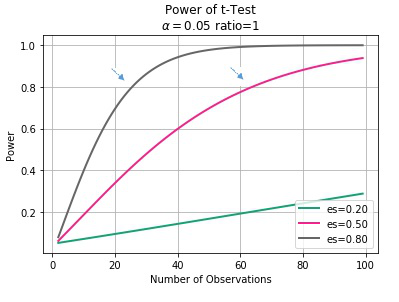

In [0]:
path="/content/drive/My Drive/Colab Notebooks/PowerAnalysis/images/graphann.jpg"
display(Image.open(path))

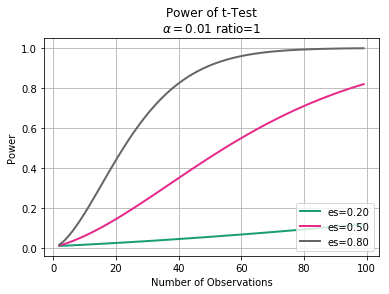

In [0]:
# Calculate power curves from multiple power analyses
# Assume a significance (alpha value) of a=0.01 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.01, ratio=1, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$' + ' ' + 'ratio=1')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Power of T-Test curve a=0.01, ratio=1.** The graph shows the relationship between sample size and power. The sample size (n=38) would be necessary to achieve 80% power with a significance of 0.01 (a=0.01) and a high effect size (es=0.80). If we revisit the code from Question 1, and change parameters alpha to 0.01, the results are 

Required sample size for group 1: 38

Required sample size for group 2: 38

Total sample size: 76

Looking at the figure, we can see that the sample size needed for Group 1 is n=38. Then since the allocation ratio is 1:1 , we will need 38*1=38 samples for Group 2.

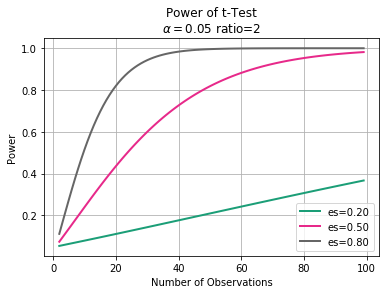

In [0]:
# Calculate power curves from multiple power analyses
# Assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes. Ratio is set to 2. 
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, ratio=2, title='Power of t-Test' + '\n' + r'$\alpha = 0.05$' + ' ' + 'ratio=2')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Power of T-Test curve a=0.05, ratio=2.** The graph shows the relationship between sample size and power. The sample size (n=19) would be necessary to achieve 80% power with a significance of 0.05 (a=0.05), a high effect size (es=0.80). If we revisit the code from Question 1, and change ratio to 2, the results are as follows:

Required sample size for group 1: 19

Required sample size for group 2: 38

Total sample size: 57

Looking at the figure, we can see that the sample size needed for Group 1 is n=19. Then since the allocation ratio is 2:1 , we will need 19*2=38 samples for Group 2.

*Finally, larger sample sizes allow hypothesis tests to detect smaller effects. The larger the effect size, the less likely it is to be random error.*


**Summary**

This tutorial demonstrates how to perform statistical power of a hypothesis test and now to calculate power analyses and power curves as part of experimental design.

Now you have completed the tutorial, you should know:

* Statistical power is the probability that the test rejects the null hypothesis when a specific alternative hypothesis is true. The statistical power ranges from 0 to 1, and as statistical power increases, the probability of making a type II error decreases. 

* Power curves are line plots that show how the change in variables, such as effect size and sample size, impact the power of the statistical test.

* A power analysis can be used to estimate the minimum sample size required for an experiment, given a desired significance level, effect size, and statistical power.

* How to calculate and plot power analysis for the Student’s t test in Python in order to effectively design an experiment.


*Many thanks to Jason Brownlee for providing excellent tutorials. The content was inspired by [A Gentle Introduction to Statistical Power and Power Analysis in Python](https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/).  Jason Brownlee's website contains tutorials for Machine Learning.**